In [1]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#construct path to csv
vinyl_data = Path('resources/final_record_collection_mk3.csv')

vinyl_df = pd.read_csv(vinyl_data)
vinyl_df.head()

,Artist,Album,Year,Genre,Price,Date Purchased,Refined ChatGPT Genre,Sub_Genre_1,Sub_Genre_2,Sub_Genre_3
0,.38 Special,WIld-Eyed Southern Boys,1980.0,Rock,5.0,NaN,"['Southern Rock', 'Arena Rock', 'Blues Rock']",Southern Rock,Arena Rock,Blues Rock
1,.38 Special,Special Forces,1982.0,Rock,4.0,NaN,"['Southern Rock', 'Arena Rock', 'Blues Rock']",Southern Rock,Arena Rock,Blues Rock
2,.38 Special,Tour De Force,1983.0,Rock,5.0,NaN,"['Southern Rock', 'Arena Rock', 'Blues Rock']",Southern Rock,Arena Rock,Blues Rock
3,100gecs,1000 gecs,2019.0,Hyper Pop,24.0,NaN,"['Experimental Electronic', 'Electropop', 'Gli...",Experimental Electronic,Electropop,Glitch Pop
4,2Pac,2Pac Greatest Hits,1998.0,Rap,70.0,10/28/2023,"['West Coast Hip Hop', 'Gangsta Rap', 'Politic...",West Coast Hip Hop,Gangsta Rap,Political Rap


In [3]:
vinyl_df.columns

Index(['Artist', 'Album', 'Year', 'Genre', 'Price', 'Date Purchased',
       'Refined ChatGPT Genre', 'Sub_Genre_1', 'Sub_Genre_2', 'Sub_Genre_3'],
      dtype='object')

In [4]:
vinyl_df.dtypes

Artist                    object
Album                     object
Year                     float64
Genre                     object
Price                    float64
Date Purchased            object
Refined ChatGPT Genre     object
Sub_Genre_1               object
Sub_Genre_2               object
Sub_Genre_3               object
dtype: object

In [5]:
grouped_by_genre = vinyl_df.groupby("Genre")
grouped_by_genre["Album"].count() #length of the df

Genre
Afrobeat             2
Alternative          8
Alternative Rock    40
Ambient              1
Ambient Jazz         1
                    ..
Surf Rock            1
Synth Pop            2
Techno               1
Thrash Metal         3
Zam Rock             1
Name: Album, Length: 84, dtype: int64

In [6]:
#Get a list of genres
genres = vinyl_df["Genre"].unique()

print(genres)

['Rock' 'Hyper Pop' 'Rap' 'House' 'Hip Hop' 'Soul' 'Pop' 'Hard Rock'
 'Jazz' 'Prog Rock' 'Folk Rock' 'Alternative Rock' 'Indie' 'R&B' 'Disco'
 'Soundtrack' 'City Pop' 'Alternative' 'Bossa Nova' 'Punk' 'Country'
 'Funk' 'Pop Rock' 'Blues' 'Reggae' 'Discoid Funk' 'Afrobeat' 'Jungle'
 'Electronic' 'Pscyhadelic Rock' 'Hair Metal' 'Pschadelic Rock' 'New Wave'
 'Dance Pop' 'Nu Metal' 'Folk' 'Punk Rock' 'Metal' 'J-Pop' 'Ambient Jazz'
 'Boogie' 'Jai Wave' 'Progressive Rock' 'Pscyhadelic Folk' 'Post-Punk'
 'Heavy Metal' 'Indie Pop' 'Psychadelia' 'Soul Jazz' 'Rock and Roll'
 'Indie Folk' 'Southern Rock' 'Synth Pop' 'Psychadelic Jazz' 'Soft Rock'
 'Thrash Metal' 'Reggae Fusion' 'Indie Rock' 'Progressive' 'Emo'
 'Chamber Folk' 'Lofi Hip Hop' 'Future Bass' 'Ambient' 'Rap Rock'
 'Arena Rock' 'Zam Rock' 'Dub' 'Modern Soul' 'Deep House' 'Jazz Funk'
 'Modern City Pop' 'Latin Rock' 'Jazz Rock' 'Blues Rock' 'Glam Rock'
 'Art Rock' 'Psychedelic Rock' 'Flamenco' 'Surf Rock' 'Mardi-Gras Funk'
 'Compilation'

In [7]:
#Get list of counts that matches each genre
counts = vinyl_df.groupby("Genre").size()

count_2 = vinyl_df.groupby("Genre").value_counts()
#counts = counts.reset_index(name='count')

print(counts)
print("Count of all items:", counts.sum())

Genre
Afrobeat             2
Alternative          8
Alternative Rock    40
Ambient              1
Ambient Jazz         1
                    ..
Surf Rock            1
Synth Pop            2
Techno               1
Thrash Metal         3
Zam Rock             1
Length: 84, dtype: int64
Count of all items: 694


<BarContainer object of 84 artists>

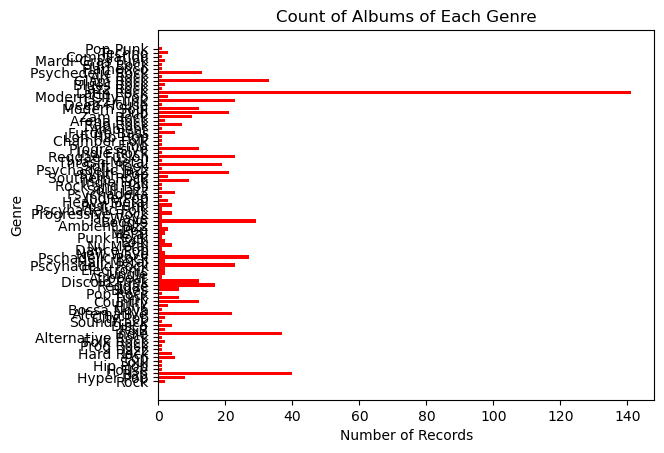

In [8]:
plt.title("Count of Albums of Each Genre")
plt.xlabel("Number of Records")
plt.ylabel("Genre")
plt.barh(genres, counts, color='r', align='center')

In [9]:
#Sort this such that the most is at the top
genre_counts_dict = dict(zip(genres, counts))
#print(genre_counts_dict)

# for key, value in genre_counts_dict:
#     print(key, type(key))
#     print(value, type(value))
frequency = {}
for k, v in vinyl_df.iterrows():
    genre = v['Genre']
    if (genre in frequency):
        frequency[genre] += 1
    else:
        frequency[genre] = 1
print(frequency)

{'Rock': 141, 'Hyper Pop': 1, 'Rap': 12, 'House': 2, 'Hip Hop': 27, 'Soul': 33, 'Pop': 21, 'Hard Rock': 23, 'Jazz': 29, 'Prog Rock': 23, 'Folk Rock': 17, 'Alternative Rock': 40, 'Indie': 4, 'R&B': 21, 'Disco': 22, 'Soundtrack': 13, 'City Pop': 37, 'Alternative': 8, 'Bossa Nova': 2, 'Punk': 2, 'Country': 4, 'Funk': 12, 'Pop Rock': 19, 'Blues': 4, 'Reggae': 23, 'Discoid Funk': 1, 'Afrobeat': 2, 'Jungle': 1, 'Electronic': 12, 'Pscyhadelic Rock': 1, 'Hair Metal': 2, 'Pschadelic Rock': 1, 'New Wave': 9, 'Dance Pop': 1, 'Nu Metal': 3, 'Folk': 6, 'Punk Rock': 10, 'Metal': 5, 'J-Pop': 3, 'Ambient Jazz': 1, 'Boogie': 1, 'Jai Wave': 1, 'Progressive Rock': 12, 'Pscyhadelic Folk': 1, 'Post-Punk': 1, 'Heavy Metal': 2, 'Indie Pop': 1, 'Psychadelia': 5, 'Soul Jazz': 1, 'Rock and Roll': 1, 'Indie Folk': 2, 'Southern Rock': 1, 'Synth Pop': 2, 'Psychadelic Jazz': 1, 'Soft Rock': 2, 'Thrash Metal': 3, 'Reggae Fusion': 3, 'Indie Rock': 2, 'Progressive': 1, 'Emo': 6, 'Chamber Folk': 1, 'Lofi Hip Hop': 3, '

In [10]:
sorted_genres = sorted(frequency.items(), key= lambda x:x[1], reverse=True)
type(sorted_genres)

list

In [11]:
#Creates two lists by using the unpack symbol in zip to effectively un-zip
genre,frequencies = zip(*sorted_genres)

<BarContainer object of 84 artists>

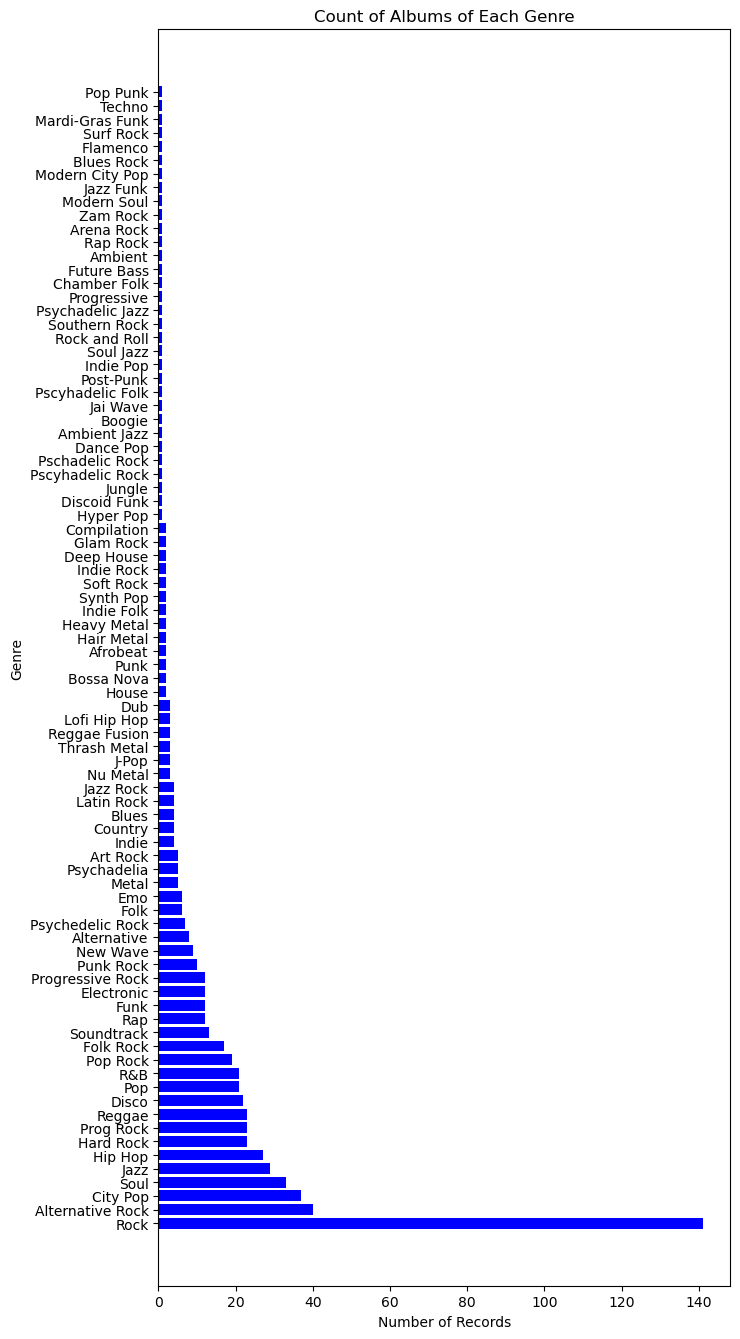

In [12]:
#rcParams lets me set the size of the chart
plt.rcParams["figure.figsize"]=[7.5, 13.5]
plt.rcParams["figure.autolayout"]=True
plt.title("Count of Albums of Each Genre")
plt.xlabel("Number of Records")
plt.ylabel("Genre")
plt.barh(genre, frequencies, color='b')